In [101]:
import pandas as pd
# df
label = [1,1,1,1,1,1, 0,0,0,0,0,0,0]
samples = [0,1,3,4,5,6,7, 2,2.5,4.5,8,10,12]

df = pd.DataFrame([samples, label]).transpose()
df.columns = ['samples', 'label']

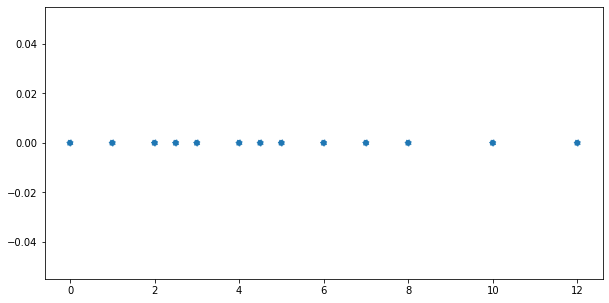

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# plot them
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
# plt.scatter(x, y, ls='dotted', c=df['label'])
plt.scatter(samples, y, ls='dotted')
plt.show()

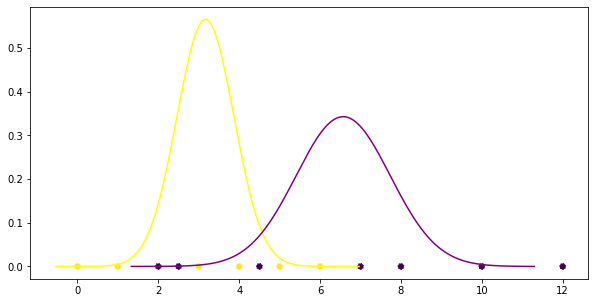

In [13]:
import scipy.stats

# find mean and std of x1
mu_1 = np.mean(x[:6])
std_1 = np.std(x[:6])/3

# find mean and std of x2
mu_2 = np.mean(x[6:])
std_2 = np.std(x[6:])/3

# sample many many times from this two normal distribution 
samples_1 = np.random.normal(mu_1, std_1, 100000)
samples_2 = np.random.normal(mu_2, std_2, 100000)

# get pdf from the samples 
y_normal_1 = scipy.stats.norm(mu_1, std_1).pdf(np.sort(samples_1))
y_normal_2 = scipy.stats.norm(mu_2, std_2).pdf(np.sort(samples_2))

# plot 
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(x) + y_value
plt.scatter(x, y, ls='dotted', c=df['label'])
plt.plot(np.sort(samples_1), y_normal_1, c='yellow')
plt.plot(np.sort(samples_2), y_normal_2, c='purple')

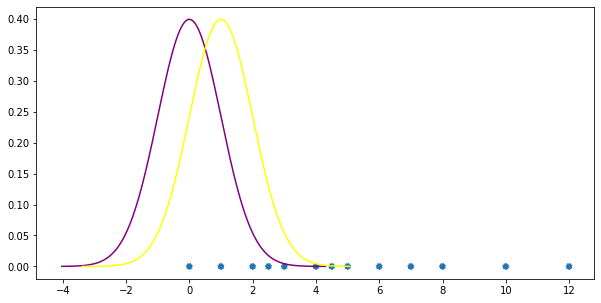

In [206]:
# first initial
mu1 = 0
sigma1 = 1

mu2 = 1
sigma2 = 1

# sample many many times from this two initial normal distribution 
samples_1 = np.random.normal(mu1, sigma1, 100000)
samples_2 = np.random.normal(mu2, sigma2, 100000)
# get pdf from the samples 
y_normal_1 = scipy.stats.norm(mu1, sigma1).pdf(np.sort(samples_1))
y_normal_2 = scipy.stats.norm(mu2, sigma2).pdf(np.sort(samples_2))
# plot
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted')
plt.plot(np.sort(samples_1), y_normal_1, c='purple')
plt.plot(np.sort(samples_2), y_normal_2, c='yellow')

In [105]:
p0 = [scipy.stats.norm(mu1,sigma1).pdf(x) for x in samples]
p1 = [scipy.stats.norm(mu2,sigma2).pdf(x) for x in samples]

class_pred= []

for x, y in zip(p0, p1):
    if x < y: 
        class_pred_i = 1
    else:
        class_pred_i = 0
    class_pred.append(class_pred_i)

In [107]:
class_pred

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

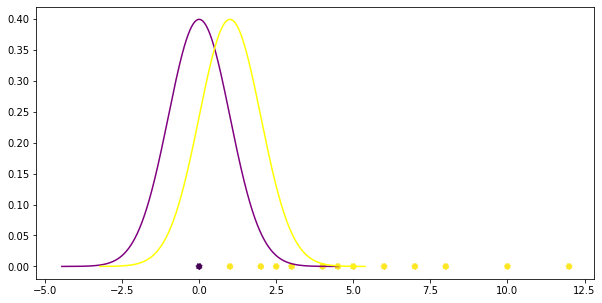

In [109]:
# plot 
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted', c=class_pred)
# plt.scatter(x, y, ls='dotted')
plt.plot(np.sort(samples_1), y_normal_1, c='purple')
plt.plot(np.sort(samples_2), y_normal_2, c='yellow')

In [171]:
# get likelihood for each x from gaussian_1 and gaussian_0

# get likelihood of x in gaussian_1
likelihood_x_gaussian_1 = [1/np.sqrt(2*3.14) * np.exp((-1/2)*(xi**2)) for xi in samples]

# get likelihood of x in gaussian_0
likelihood_x_gaussian_0 = [1/np.sqrt(2*3.14) * np.exp((-1/2)*((xi-1)**2)) for xi in samples]

# create a dataframe 
df_likelihood = pd.DataFrame([samples, likelihood_x_gaussian_1, likelihood_x_gaussian_0]).transpose()
df_likelihood.columns = ['samples', 'p(X=x|class0)', 'p(X=x|class1)']
df_likelihood

,samples,p(X=x|class0),p(X=x|class1)
0,0.0,3.990434e-01,2.420321e-01
1,1.0,2.420321e-01,3.990434e-01
2,3.0,4.432972e-03,5.400466e-02
3,4.0,1.338642e-04,4.432972e-03
4,5.0,1.487097e-06,1.338642e-04
5,6.0,6.077424e-09,1.487097e-06
6,7.0,9.137037e-12,6.077424e-09
7,2.0,5.400466e-02,2.420321e-01
8,2.5,1.753275e-02,1.295504e-01
9,4.5,1.598779e-05,8.729040e-04


In [172]:
# get likelihood of gaussian_1/guassian_0 occurs given samples 

# define prior
prior_class_0 = 0.5
prior_class_1 = 0.5

# get liklihood of gaussian_1 occurs based on x1
df_likelihood['p(class0|x)'] = df_likelihood.apply(lambda row: 
                                                       row["p(X=x|class0)"] * 0.5/(row["p(X=x|class1)"]*0.5+row["p(X=x|class0)"]*0.5),
                                                       axis =1
                                                      )
# get liklihood of gaussian_0 occurs based on x1
df_likelihood['p(class1|x)'] = df_likelihood.apply(lambda row: 
                                                       row['p(X=x|class1)'] * 0.5/(row['p(X=x|class1)']*0.5+row['p(X=x|class0)']*0.5),
                                                       axis=1
                                                      )

In [169]:
np.round(df_likelihood['p(class0|x)'].values / sum(df_likelihood['p(class0|x)'].values),2)

array([0.43, 0.26, 0.05, 0.02, 0.01, 0.  , 0.  , 0.13, 0.08, 0.01, 0.  ,
       0.  , 0.  ])

In [173]:
# standardization of p(Gaussian_1|x) and p(Gaussian_0|x)

df_likelihood['p(class0|x)_standardized'] = df_likelihood['p(class0|x)'] / sum(df_likelihood['p(class0|x)'])
df_likelihood['p(class1|x)_standardized'] = df_likelihood['p(class1|x)'] / sum(df_likelihood['p(class1|x)'])

In [174]:
df_likelihood

,samples,p(X=x|class0),p(X=x|class1),p(class0|x),p(class1|x),p(class0|x)_standardized,p(class1|x)_standardized
0,0.0,3.990434e-01,2.420321e-01,0.622459,0.377541,0.431670,0.032665
1,1.0,2.420321e-01,3.990434e-01,0.377541,0.622459,0.261821,0.053855
2,3.0,4.432972e-03,5.400466e-02,0.075858,0.924142,0.052607,0.079957
3,4.0,1.338642e-04,4.432972e-03,0.029312,0.970688,0.020328,0.083984
4,5.0,1.487097e-06,1.338642e-04,0.010987,0.989013,0.007619,0.085569
5,6.0,6.077424e-09,1.487097e-06,0.004070,0.995930,0.002823,0.086168
6,7.0,9.137037e-12,6.077424e-09,0.001501,0.998499,0.001041,0.086390
7,2.0,5.400466e-02,2.420321e-01,0.182426,0.817574,0.126510,0.070737
8,2.5,1.753275e-02,1.295504e-01,0.119203,0.880797,0.082666,0.076207
9,4.5,1.598779e-05,8.729040e-04,0.017986,0.982014,0.012473,0.084964


In [179]:
# update mu1, mu2, sigma1, sigma2

mu1_new = sum(df_likelihood['samples'] * df_likelihood['p(class0|x)_standardized'])
print(mu1_new)
variance1_new = sum((df_likelihood['samples']-mu1_new)**2 * df_likelihood['p(class0|x)_standardized'])
print(variance1_new)
sigma1_new = np.sqrt(variance1_new/len(samples))
print(sigma1_new)
mu2_new = sum(df_likelihood['samples'] * df_likelihood['p(class1|x)_standardized'])
print(mu2_new)
variance2_new = sum((df_likelihood['samples']-mu2_new)**2 * df_likelihood['p(class1|x)_standardized'])
print(variance2_new)
sigma2_new = np.sqrt(variance2_new/len(samples))
print(sigma2_new)

1.082757959291563
1.5372953782984593
0.3438800526903865
5.488716013124685
10.589687053652668
0.902547124431426


In [182]:
# update the prior
prior_class_0 = sum(df_likelihood['p(class0|x)'])/ 12
print(prior_class_0)

prior_class_1 = sum(df_likelihood['p(class1|x)'])/ 12
print(prior_class_1)

0.12016509033515053
0.9631682429981828


In [127]:
sigma2_new

1.5376870367819582

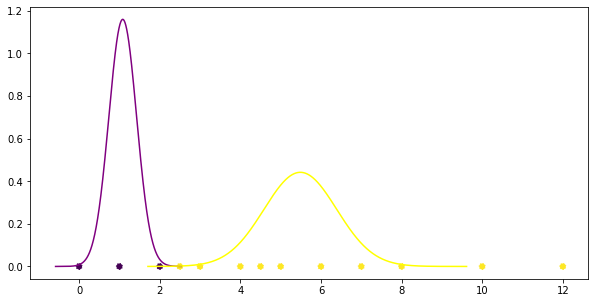

In [180]:
# finish 1st round

# generate class label if we need a hard assignment
p0 = [scipy.stats.norm(mu1_new,sigma1_new).pdf(x) for x in samples]
p1 = [scipy.stats.norm(mu2_new,sigma2_new).pdf(x) for x in samples]

class_pred= []

for x, y in zip(p0, p1):
    if x < y: 
        class_pred_i = 1
    else:
        class_pred_i = 0
    class_pred.append(class_pred_i)

# sample 100000 times from this two updated normal distribution from initial
samples_1 = np.random.normal(mu1_new, sigma1_new, 100000)
samples_2 = np.random.normal(mu2_new, sigma2_new, 100000)
# get pdf from the samples 
y_normal_1 = scipy.stats.norm(mu1_new, sigma1_new).pdf(np.sort(samples_1))
y_normal_2 = scipy.stats.norm(mu2_new, sigma2_new).pdf(np.sort(samples_2))
# plot 
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted', c=class_pred)
plt.plot(np.sort(samples_1), y_normal_1, c='purple')
plt.plot(np.sort(samples_2), y_normal_2, c='yellow')

In [209]:
def expectation_maximization(df,mu1, sigma1, mu2, sigma2, prior_class_1, prior_class_0,max_iteration):
    
    likelihoods = []
    i = 0
    while i <= max_iteration:
        # E step
        # get likelihood of x in class0
        df['p(X=x|class0)'] = [scipy.stats.norm(mu1, sigma1).pdf(x) for x in df.samples]

        # get likelihood of x in class1
        df['p(X=x|class1)'] = [scipy.stats.norm(mu2, sigma2).pdf(x) for x in df.samples]
        
        # get likelihood that need to be maximized 
        likelihood = sum([np.log(x) for x in (prior_class_1*df['p(X=x|class0)']+prior_class_0*df['p(X=x|class1)'])])
        likelihoods.append(likelihood)                

        ## get likelihood of class0 given x
        df['p(class0|x)'] = df.apply(lambda row: 
                                         row["p(X=x|class0)"] * prior_class_1/(row["p(X=x|class0)"]*prior_class_1+row["p(X=x|class1)"]*prior_class_1),
                                         axis =1
                                        )

        ## get liklihood of class1 occurs given x
        df['p(class1|x)'] = df.apply(lambda row: 
                                         row['p(X=x|class1)'] * prior_class_0/(row['p(X=x|class0)']*prior_class_0+row['p(X=x|class1)']*prior_class_0),
                                         axis=1
                                        )
        # standardize the likelihood 
        df['p(class0|x)_standardized'] = df['p(class0|x)'] / sum(df['p(class0|x)'])
        df['p(class1|x)_standardized'] = df['p(class1|x)'] / sum(df['p(class1|x)'])

        # M step:
        ## update the parameters by taking expectation 
        mu1 = sum(df['samples'] * df['p(class0|x)_standardized'])
        variance1 = sum((df['samples']-mu1)**2 * df['p(class0|x)_standardized'])
        sigma1 = np.sqrt(variance1_new/df.shape[0])

        mu2 = sum(df['samples'] * df['p(class1|x)_standardized'])
        variance2 = sum((df['samples']-mu2)**2 * df['p(class1|x)_standardized'])
        sigma2 = np.sqrt(variance2_new/df.shape[0])

        # Update prior
        prior_class_1 = sum(df['p(class0|x)'])/ df.shape[0]
        prior_class_0 = sum(df['p(class1|x)'])/ df.shape[0]

        # assign samples into class after updating parameters
        p0 = [scipy.stats.norm(mu1,sigma2).pdf(x) for x in df['samples']]
        p1 = [scipy.stats.norm(mu2,sigma2).pdf(x) for x in df['samples']]

        # predict class for plot
        class_pred= []

        for x, y in zip(p0, p1):
            if x < y: 
                class_pred_i = 1
            else:
                class_pred_i = 0
            class_pred.append(class_pred_i)
            
        df['class_pred'] = class_pred
        
        i += 1
    
    return mu1, sigma1, mu2, sigma2, likelihoods, df 

In [210]:
mu1, sigma1, mu2, sigma2, likelihood, df_final = expectation_maximization(df=df,
                                                                        mu1=0, sigma1=1, 
                                                                         mu2=1, sigma2=1, 
                                                                     prior_class_1=0.5, prior_class_0=0.5,
                                                                     max_iteration = 10)

In [211]:
print(sigma2)

0.902547124431426


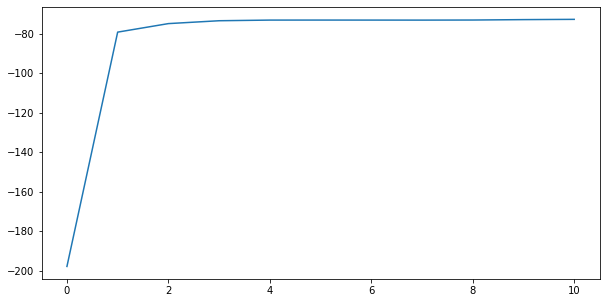

In [212]:
plt.plot(likelihood)

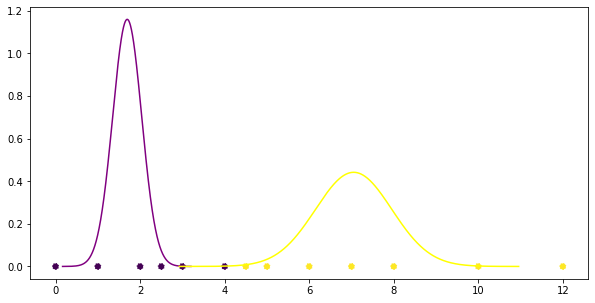

In [186]:
# sample 100000 times from this two updated normal distribution from initial
samples_1 = np.random.normal(mu1, sigma1, 100000)
samples_2 = np.random.normal(mu2, sigma2, 100000)
# get pdf from the samples 
y_normal_1 = scipy.stats.norm(mu1, sigma1).pdf(np.sort(samples_1))
y_normal_2 = scipy.stats.norm(mu2, sigma2).pdf(np.sort(samples_2))
# plot 
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted', c=df_final['class_pred'])
plt.plot(np.sort(samples_1), y_normal_1, c='purple')
plt.plot(np.sort(samples_2), y_normal_2, c='yellow')

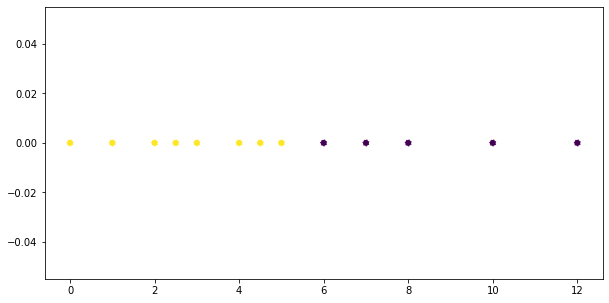

In [156]:
# use kmeans find centroid
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(np.array(samples).reshape(-1, 1))
y_kmeans = kmeans.predict(np.array(samples).reshape(-1, 1))

# plot
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted', c=y_kmeans)
plt.show()

In [196]:
scipy.stats.norm(1.69, 0.34).pdf(5) / (scipy.stats.norm(1.69, 0.34).pdf(5) + scipy.stats.norm(7.05, 0.9).pdf(5))

9.312066474213422e-20

In [197]:
scipy.stats.norm(7.05, 0.9).pdf(5) / (scipy.stats.norm(1.69, 0.34).pdf(5) + scipy.stats.norm(7.05, 0.9).pdf(5))

1.0

In [207]:
0.399/(0.399+0.24)

0.6244131455399061

In [213]:
likelihood[0]

-197.7865625322459

In [218]:
df.describe()

,samples,label,"p(X=x|mu=0, sigma=1)","p(X=x|mu=1, sigma=1)",p(Gaussian_1|x),p(Gaussian_0|x),p(Gaussian_1|x)_standardized,p(Gaussian_0|x)_standardized,class_pred,p(X=x|class0),p(X=x|class1),p(class0|x),p(class1|x),p(class0|x)_standardized,p(class1|x)_standardized
count,13.000000,13.000000,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,13.000000,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01
mean,5.000000,0.461538,7.511435e-02,7.460051e-02,3.821952e-01,6.178048e-01,7.692308e-02,7.692308e-02,0.538462,7.511435e-02,7.460051e-02,3.821952e-01,6.178048e-01,7.692308e-02,7.692308e-02
std,3.529636,0.518875,2.059782e-01,1.411105e-01,5.032488e-01,5.032488e-01,1.012871e-01,6.265967e-02,0.518875,2.059782e-01,1.411105e-01,5.032488e-01,5.032488e-01,1.012871e-01,6.265967e-02
min,0.000000,0.000000,1.943910e-196,3.388587e-14,1.859908e-189,5.944183e-10,3.743372e-190,7.401122e-11,0.000000,1.943910e-196,3.388587e-14,1.859908e-189,5.944183e-10,3.743372e-190,7.401122e-11
25%,2.500000,0.000000,9.693692e-53,1.045165e-07,2.193328e-52,2.510223e-05,4.414433e-53,3.125487e-06,0.000000,9.693692e-53,1.045165e-07,2.193328e-52,2.510223e-05,4.414433e-53,3.125487e-06
50%,4.500000,0.000000,2.541156e-15,1.672546e-03,2.784648e-13,1.000000e+00,5.604562e-14,1.245103e-01,1.000000,2.541156e-15,1.672546e-03,2.784648e-13,1.000000e+00,5.604562e-14,1.245103e-01
75%,7.000000,1.000000,6.893505e-04,3.663178e-02,9.999749e-01,1.000000e+00,2.012614e-01,1.245103e-01,1.000000,6.893505e-04,3.663178e-02,9.999749e-01,1.000000e+00,2.012614e-01,1.245103e-01
max,12.000000,1.000000,7.413056e-01,4.419628e-01,1.000000e+00,1.000000e+00,2.012665e-01,1.245103e-01,1.000000,7.413056e-01,4.419628e-01,1.000000e+00,1.000000e+00,2.012665e-01,1.245103e-01


In [219]:
z = 2.1
import scipy.stats 

In [220]:
scipy.stats.norm(0, 1).cdf(z)

0.9821355794371834

In [221]:
1-scipy.stats.norm(0, 1).cdf(z)

0.017864420562816563

In [223]:
sample_mean = 10
u = 12
sigma = 1
n = 10

In [226]:
import numpy as np
z = (sample_mean-u) / (sigma/np.sqrt(n))

In [227]:
z

-6.324555320336758

In [245]:
2*(1-scipy.stats.norm(0, 1).cdf(np.abs(z)))

2.539628507491898e-10

In [249]:
# CI 
# z for alpha = 0.01
# two tail 
scipy.stats.norm(0,1).ppf(0.005)

#ci
lower = sample_mean + scipy.stats.norm(0,1).ppf(0.005) * (sigma)/np.sqrt(n)
print(lower)
upper = sample_mean + scipy.stats.norm(0,1).ppf(1-0.005) * (sigma)/np.sqrt(n)
print(upper)

9.185451253698023
10.814548746301977


(array([116.,  99., 100., 106., 105., 111.,  86.,  85., 103.,  89.]),
 array([8.82668352e-04, 1.00649721e-01, 2.00416774e-01, 3.00183827e-01,
        3.99950880e-01, 4.99717933e-01, 5.99484985e-01, 6.99252038e-01,
        7.99019091e-01, 8.98786144e-01, 9.98553197e-01]),
 <BarContainer object of 10 artists>)

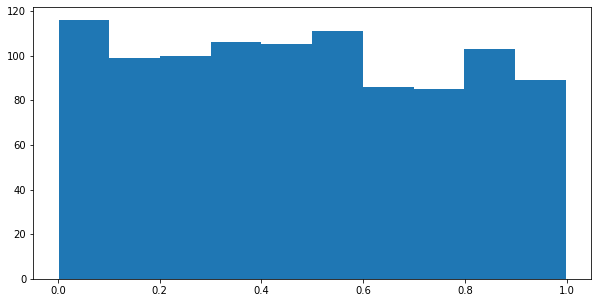

In [234]:
plt.hist(np.random.uniform(0, 1, 1000))

(array([ 12.,  24.,  68., 156., 231., 225., 155.,  88.,  34.,   7.]),
 array([-2.93108183e+00, -2.34536708e+00, -1.75965233e+00, -1.17393758e+00,
        -5.88222831e-01, -2.50808157e-03,  5.83206668e-01,  1.16892142e+00,
         1.75463617e+00,  2.34035092e+00,  2.92606566e+00]),
 <BarContainer object of 10 artists>)

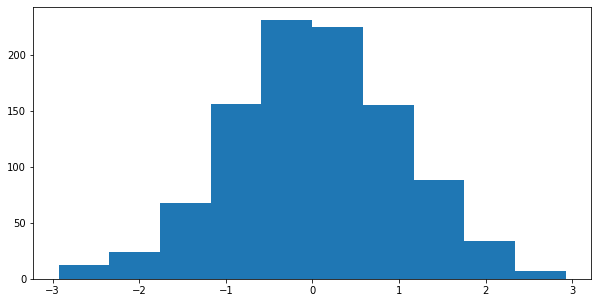

In [236]:
plt.hist(np.random.normal(0, 1, 1000))

(array([  1.,   3.,  46., 131., 222., 237., 193., 113.,  42.,  12.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

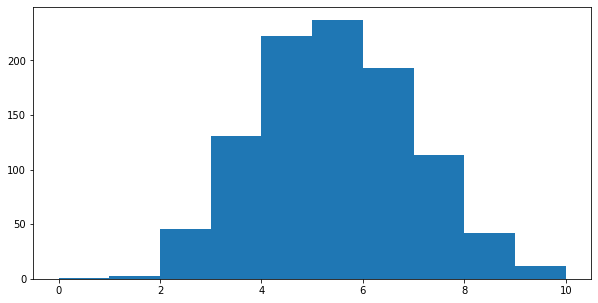

In [241]:
plt.hist(np.random.binomial(10,0.5, 1000))

(array([119., 191., 211., 178., 137.,  83.,  42.,  22.,  12.,   5.]),
 array([0.0169746 , 0.10109059, 0.18520657, 0.26932255, 0.35343854,
        0.43755452, 0.5216705 , 0.60578649, 0.68990247, 0.77401845,
        0.85813444]),
 <BarContainer object of 10 artists>)

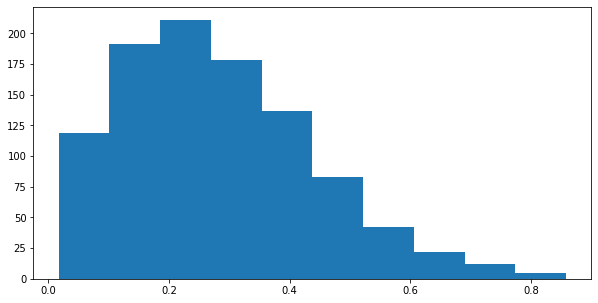

In [242]:
plt.hist(np.random.beta(2,5, 1000))

In [250]:
# linear regression 
import numpy as np
from sklearn.linear_model import LinearRegression

In [251]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [252]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [253]:
y

array([ 5, 20, 14, 32, 22, 38])

In [259]:
# fit a linear model 
from sklearn.linear_model import LinearRegression

In [260]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [264]:
yhat = model.predict(x)
yhat

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

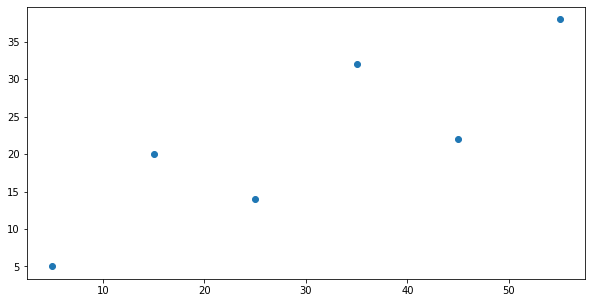

In [258]:
# check assumption 
# 1. x and y are linear correlated
plt.scatter(x, y)

(array([1., 1., 1., 0., 0., 0., 1., 0., 0., 2.]),
 array([-7.93333333, -6.39333333, -4.85333333, -3.31333333, -1.77333333,
        -0.23333333,  1.30666667,  2.84666667,  4.38666667,  5.92666667,
         7.46666667]),
 <BarContainer object of 10 artists>)

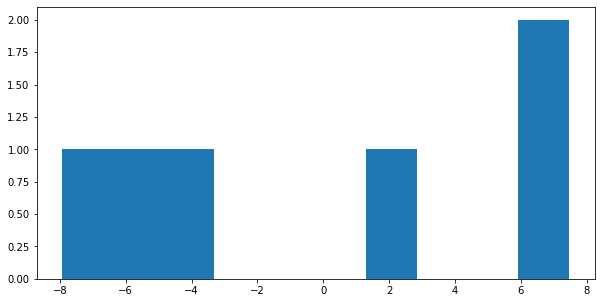

In [265]:
# 2. normality of error 
plt.hist(y-yhat)

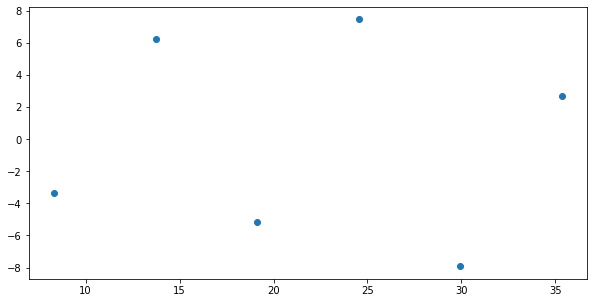

In [266]:
# 3. equal variance of error and 4. independence of error 
plt.scatter(yhat, y-yhat)

In [485]:
x = np.random.uniform(1, 10, 100)
error = np.random.normal(0,0.3,100)
y = x + error

In [488]:
# linear regression 

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x.reshape(-1,1), y)

LinearRegression()

In [489]:
lm.coef_

array([0.98926808])

In [525]:
# ci alpha = 0.05

z_upper = scipy.stats.norm(0,1).ppf(0.975)
z_lower = scipy.stats.norm(0,1).ppf(0.025)

yhat = lm.predict(x.reshape(-1,1))

mse = np.dot((yhat-y), (yhat-y))/len(x)

se = [np.sqrt(mse*(1/len(x) + (xq-np.mean(x))**2/(np.std(x)**2))) for xq in x]

In [526]:
mse

0.08986035365267861

In [523]:
z_lower

-1.9599639845400545

In [518]:
[0.98926808*xq+z_upper*np.sqrt(mse*(1/len(x) + (xq-np.mean(x))**2/(np.std(x)**2))) for xq in x]

[17.154563098908366,
 10.730239392535974,
 7.378162966052734,
 9.64124576868797,
 9.054938152445033,
 6.701168358963936,
 12.352484903228483,
 10.12878957033324,
 16.137456236798695,
 6.940869660592666,
 8.047339740967203,
 7.612649032076615,
 6.953529169356241,
 7.860871134685793,
 7.646500765671772,
 18.718625587748036,
 12.45634455716618,
 6.590876103891523,
 7.5767641609738146,
 11.651449715753078,
 7.796256263475264,
 18.45645224366198,
 6.74592756935313,
 18.443249085525995,
 18.17807509119861,
 6.623810260172635,
 16.17352865426932,
 7.405290785125757,
 9.597050230009643,
 9.88639199546341,
 6.2113303283150545,
 16.214463222526994,
 9.319672298040924,
 6.339686778215238,
 8.026804499732927,
 14.24436540331831,
 6.832853065661622,
 16.522707780006673,
 8.419061095283075,
 15.775348517923707,
 10.65581179935031,
 6.656107211931799,
 7.560734967412044,
 12.052408830433567,
 10.730728066585275,
 8.97825109546236,
 8.054126156346804,
 7.592794321980457,
 8.443065346607847,
 12.498948

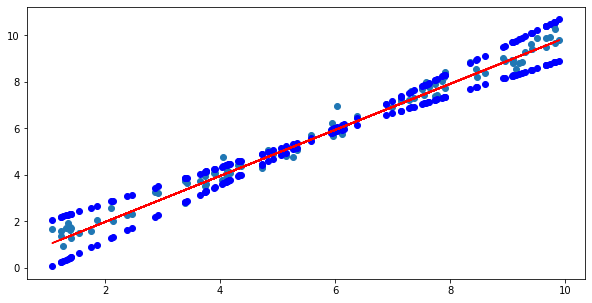

In [527]:
plt.scatter(x, y)
plt.plot(x, 0.98926808*x, color='red')
plt.scatter(x, [0.98926808*xq+z_upper*np.sqrt(mse*(1/len(x) + (xq-np.mean(x))**2/(np.std(x)**2))) for xq in x], color='blue')
plt.scatter(x, [0.98926808*xq+z_lower*np.sqrt(mse*(1/len(x) + (xq-np.mean(x))**2/(np.std(x)**2))) for xq in x], color='blue')
plt.show()


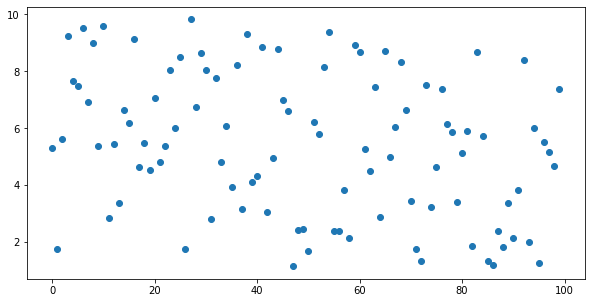

In [407]:
# indices plot 
# random 
# scale 
# location 
# from a fixed dist
plt.scatter(range(100), y.reshape(-1, 1))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

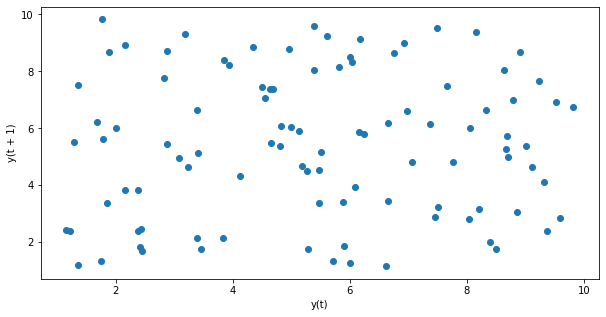

In [408]:
# 1-lag plot: plot yt and yt+1
# random 
# autocorrelation 
# outlier 
pd.plotting.lag_plot(pd.Series(y), lag= 1)

In [409]:
# probablity plot

# normal proability plot - x versus z score 
# 1.Arrange your x-values in ascending order.
# 2.Calculate fi = (i-0.375)/(n+0.25), where i is the position of the data value in the ordered list and n is the number of observations.
# 3.Find the z-score for each fi
# 4.Plot your x-values on the horizontal axis and the corresponding z-score on the vertical axis.

y_sorted = np.sort(y)
y_sorted
# normalized
y_norm = (y_sorted - np.mean(y_sorted))/np.std(y_sorted)

In [410]:
# fi
fi = [(i+1-0.375)/(len(y)+0.25) for i in range(len(y))]

In [415]:
# find z score for fi
scores = [scipy.stats.uniform(0,1).ppf(x) for x in fi]



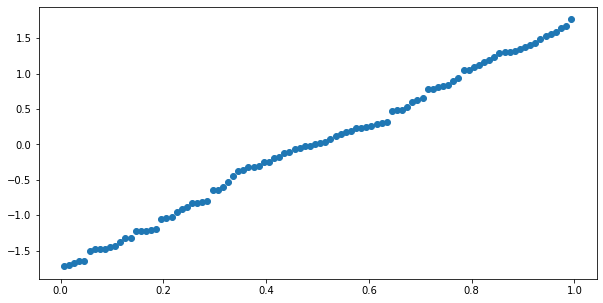

In [416]:
plt.scatter(np.array(scores), y_norm)




In [417]:
normal_test = LinearRegression().fit(np.array(scores).reshape(-1,1), y_norm.reshape(-1,1))



In [418]:
np.sqrt(normal_test.score(np.array(scores).reshape(-1,1), y_norm.reshape(-1,1)))



0.998138834468718

In [429]:
# boostrap plots
mean_all = []
median_all = []
midrange_all = []

for i in range(1000):
    y_new = np.random.choice(y, size=100, replace=True)
    mean = np.mean(y_new)
    median = np.median(y_new)
    midrange = (np.max(y_new) + np.min(y_new))/2
    
    mean_all.append(mean)
    median_all.append(median)
    midrange_all.append(midrange)
    

4.981404879972984 5.946395043748414


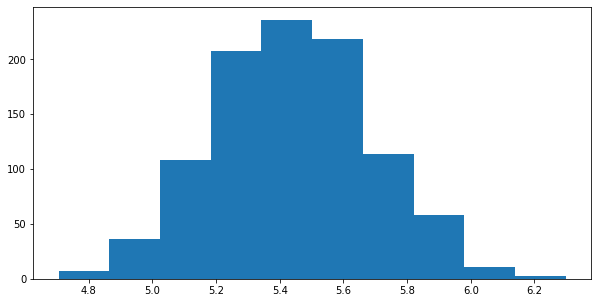

In [430]:
plt.hist(mean_all)
print(np.sort(mean_all)[25], np.sort(mean_all)[975])



4.889494361098665 6.059709361491444


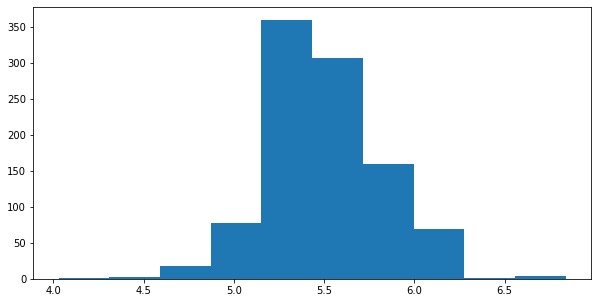

In [431]:
plt.hist(median_all)
print(np.sort(median_all)[25], np.sort(median_all)[975])


5.264137686676245 5.585197241147373


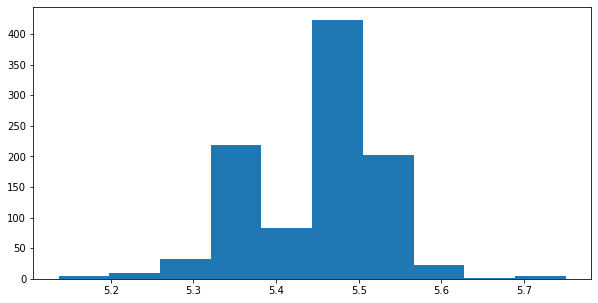

In [432]:
plt.hist(midrange_all)
print(np.sort(midrange_all)[25], np.sort(midrange_all)[975])


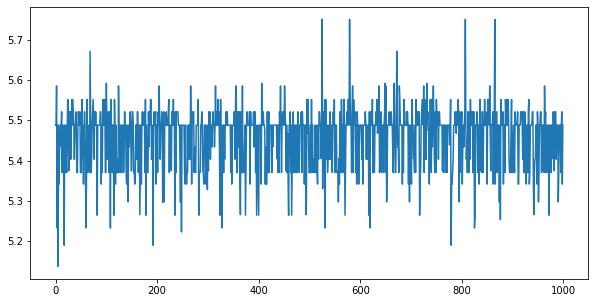

In [437]:
plt.plot(midrange_all)

In [382]:
# x
x_sorted = np.sort(x)

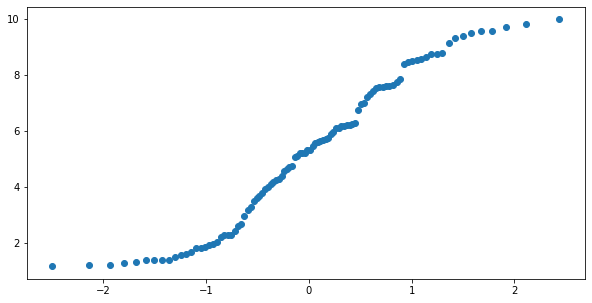

In [367]:
# compute normal probability plot
fi = [(i+1-0.375)/(100+0.365) for i in range(100)]
zscores = [scipy.stats.norm(0,1).ppf(x) for x in fi]

plt.scatter(zscores, x_sorted)



In [363]:
# find coeffecient 
normal_test_x = LinearRegression().fit(x_sorted.reshape(-1,1), np.array(zscores).reshape(-1,1))




In [364]:
np.sqrt(normal_test_x.score(x_sorted.reshape(-1,1), np.array(zscores).reshape(-1,1)))

0.9775408400643285

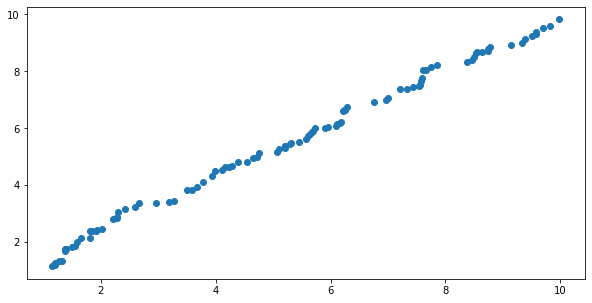

In [439]:
# qq plot
plt.scatter(x_sorted, y_sorted)


In [440]:
# 
np.random.uniform(0,1, 100)

array([0.31644294, 0.08351388, 0.06246294, 0.31935166, 0.67052432,
       0.38541706, 0.83321582, 0.78224119, 0.10923068, 0.65755724,
       0.67091578, 0.98600537, 0.27540737, 0.69962742, 0.01321511,
       0.00796625, 0.52744814, 0.83624817, 0.69457471, 0.02230099,
       0.68308936, 0.81667746, 0.69949423, 0.72441134, 0.94215642,
       0.38491426, 0.6441381 , 0.1245682 , 0.40485971, 0.69678371,
       0.45035468, 0.97040736, 0.65254599, 0.05707253, 0.28607588,
       0.97655044, 0.53120118, 0.9913569 , 0.64358946, 0.41724104,
       0.37987979, 0.90931252, 0.2076268 , 0.1692462 , 0.0831124 ,
       0.1685261 , 0.80892516, 0.85659872, 0.38180938, 0.1203953 ,
       0.52897842, 0.00346248, 0.26282975, 0.97218334, 0.52544207,
       0.8715183 , 0.259142  , 0.77935738, 0.01496827, 0.24304163,
       0.65575519, 0.91192139, 0.18895336, 0.13338948, 0.43765963,
       0.18959454, 0.09101286, 0.17176027, 0.92383453, 0.33242934,
       0.75602295, 0.57035048, 0.60736979, 0.85889662, 0.43731

In [444]:
#
len([x for x in np.random.uniform(0,1, 1000) if x < 0.75])




752

In [448]:
samples = [1  if x <= 0.75 else 0 for x in np.random.uniform(0,1, 1000)]




[0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,


In [451]:
sum(samples)

65.0

In [474]:
# prior p is from beta(1,1)
# likelihood (x|p) = binomila(p)
# posterior (p|x) = prior * likelihood / sum(prior * likelihood)

# sample 1000 k p from beta(1,1) - uniform distribution 
prior = np.random.beta(5,5, 1000)

In [475]:
# likelihood 
likelihood = [scipy.stats.binom(100, x).pmf(65) for x in prior]

In [476]:
likelihood

[0.0002480523864062441,
 0.06395384039894496,
 2.6539604274846583e-13,
 1.7275937241642467e-05,
 0.008069171211751573,
 0.00043051443110360383,
 3.725028001066675e-10,
 0.01924472111444105,
 3.574219609557609e-05,
 2.7754198069213353e-05,
 1.3325883943544397e-10,
 0.0002118333009280646,
 0.03549230522124114,
 0.00391668600589359,
 0.08089051790625201,
 0.06625199832236306,
 0.005983712692184844,
 3.509040122687301e-08,
 1.5717183806955904e-10,
 6.3087796800296e-14,
 0.0011651686759572438,
 0.006849024142692619,
 0.02074458847485302,
 0.0018607154866061145,
 0.00011341309126353122,
 0.0035934064763928505,
 0.08051375464491425,
 5.964349594938011e-07,
 0.026723742476807213,
 0.009406675193947328,
 4.633557495242283e-08,
 7.092445194457769e-06,
 0.04195530417022566,
 0.00048190265426489604,
 1.0234947976056462e-06,
 0.00047603888058977517,
 0.08325159357057414,
 1.1760735255073073e-15,
 5.654571484620854e-07,
 0.0147717949645987,
 0.07977646715277695,
 8.072618631426632e-12,
 4.7218620792

In [477]:
# posterior 
posterior = prior*likelihood/sum(prior*likelihood)

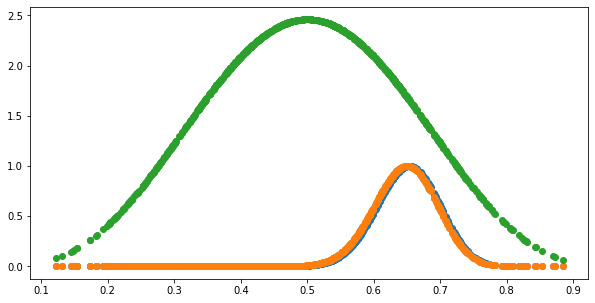

In [484]:
plt.scatter(prior, posterior/np.max(posterior))
plt.scatter(prior, likelihood/np.max(likelihood))
plt.scatter(prior, [scipy.stats.beta(5,5).pdf(x) for x in prior])

In [17]:
import numpy as np

x = np.random.binomial(1, 0.5, size = 100)
y = np.random.binomial(1, 0.5, size = 100)




In [18]:
[1 for a, b in zip(x,y) if a==1 and b==1]


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
from sklearn.metrics import confusion_matrix 